In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Imported code from github. generates confusion matrix using Seaborn
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [150]:
import pandas as pd
import sklearn
import numpy

from sklearn.linear_model import LogisticRegression

#import data
dataArray = pd.read_csv('heart.csv')

arr = dataArray.to_numpy()

#proccess arrays
xVal , yVal  = numpy.concatenate((arr[25:165,:-1], arr[166:-25,:-1])), numpy.concatenate((arr[25:165,-1], arr[166:-25,-1])) 

xTest , yTest = numpy.concatenate((arr[0:25,:-1], arr[-25:,:-1])), numpy.concatenate((arr[0:25,-1], arr[-25:,-1]))

#prints out shape
print(xVal.shape, yVal.shape)

print(xTest.shape, yTest.shape)

# initialize logistic regression model from sklearn
logisticRegr = LogisticRegression(verbose=True, max_iter = 1000)

# fit logistic regression model using training data
logisticRegr.fit(xVal,yVal)

(252, 13) (252,)
(50, 13) (50,)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, verbose=True)

In [152]:
# output predicted values for test data
predictedValues = logisticRegr.predict(xTest)

In [153]:
# generate accuracy score
print("accuracy: " + logisticRegr.score(xTest, yTest))

0.78

[[15 10]
 [ 1 24]]


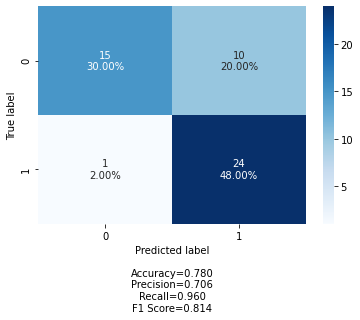

In [154]:
# Confusion matrix stuff
confusionMatrixLogistic = sklearn.metrics.confusion_matrix(yTest, predictedValues)
print(confusionMatrixLogistic)

make_confusion_matrix(confusionMatrixLogistic)

In [155]:
# reshape predicted values matricies fro tabular output
yTest = numpy.reshape(yTest, (-1, 1))
predictedValues = numpy.reshape(predictedValues, (-1, 1))

output = numpy.append(xTest,yTest,axis=1)
output = numpy.append(output, predictedValues, axis=1)


In [156]:
# convert numpy array into pandas dataframe
outputFrame = pd.DataFrame(data=output, columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target","predicted"])

In [157]:
# output pandas dataframe
outputFrame.style
# and that is pretty much it?

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predicted
0,63.000000,1.000000,3.000000,145.000000,233.000000,1.000000,0.000000,150.000000,0.000000,2.300000,0.000000,0.000000,1.000000,1.000000,1.000000
1,37.000000,1.000000,2.000000,130.000000,250.000000,0.000000,1.000000,187.000000,0.000000,3.500000,0.000000,0.000000,2.000000,1.000000,1.000000
2,41.000000,0.000000,1.000000,130.000000,204.000000,0.000000,0.000000,172.000000,0.000000,1.400000,2.000000,0.000000,2.000000,1.000000,1.000000
3,56.000000,1.000000,1.000000,120.000000,236.000000,0.000000,1.000000,178.000000,0.000000,0.800000,2.000000,0.000000,2.000000,1.000000,1.000000
4,57.000000,0.000000,0.000000,120.000000,354.000000,0.000000,1.000000,163.000000,1.000000,0.600000,2.000000,0.000000,2.000000,1.000000,1.000000
5,57.000000,1.000000,0.000000,140.000000,192.000000,0.000000,1.000000,148.000000,0.000000,0.400000,1.000000,0.000000,1.000000,1.000000,1.000000
6,56.000000,0.000000,1.000000,140.000000,294.000000,0.000000,0.000000,153.000000,0.000000,1.300000,1.000000,0.000000,2.000000,1.000000,1.000000
7,44.000000,1.000000,1.000000,120.000000,263.000000,0.000000,1.000000,173.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000
8,52.000000,1.000000,2.000000,172.000000,199.000000,1.000000,1.000000,162.000000,0.000000,0.500000,2.000000,0.000000,3.000000,1.000000,1.000000
9,57.000000,1.000000,2.000000,150.000000,168.000000,0.000000,1.000000,174.000000,0.000000,1.600000,2.000000,0.000000,2.000000,1.000000,1.000000
